**Task 2 - Implementing LSTM for Time-Series Forecasting**


***Read the following descriptions and instructions***

Time-series forecasting is a crucial task in various fields, including finance, economics, and weather prediction. In this question, you'll work with Long Short-Term Memory (LSTM) networks, a type of recurrent neural network (RNN) that is particularly effective at learning from sequences of data. LSTMs are designed to capture long-term dependencies in time-series data, making them well-suited for predicting future values based on historical patterns.

In this task, you will implement an LSTM model to forecast stock prices using historical data. Specifically, you'll use the closing prices of a stock to predict future prices, which is a common real-world application of time-series analysis in financial markets. This exercise will help you understand the principles of sequence modeling and how LSTMs can be applied to complex prediction tasks.

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
# 1. Load and Preprocess the Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df['Close'].values  # Use the 'Close' price for prediction

In [4]:
# 2. Prepare the Dataset for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [5]:
# Load Data
file_path = 'path'  # Path to the dataset in Colab or Jupyter home directory
data = load_data('./Goog.csv')

In [6]:
# Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

**time_step = 60:** This variable defines the length of the input sequence, meaning we will use the past 60 days of stock prices to predict the next day's closing price. This value is chosen to capture enough historical information to make an accurate prediction. You can change and try

In [7]:

# Create the Dataset
time_step = 60  # Using 60 days of data to predict the next day's price
X, y = create_dataset(data, time_step)

In [8]:
# Reshape for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [9]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

***Modify the number of units in the LSTM layers and consider adding more layers or changing the dropout rate to see how these adjustments affect the model's performance***

Experiment with 'units'

Experiment with dropout for regularization

Add another LSTM layer



In [10]:
# 3. Define the LSTM Model
model = Sequential()

# --- Students: Modify the number of LSTM layers and units to experiment with model complexity ---
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))  # <-- Experiment with 'units'
model.add(Dropout(0.2))  # Experiment with dropout for regularization

model.add(LSTM(units=50, return_sequences=False))  # <-- Add another LSTM layer
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

***Adjust the epochs and batch_size during the training phase to optimize the model’s learning process and its ability to generalize.***

In [11]:
# 4. Train the Model

model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/20
5/5 [==============================] - 5s 42ms/step - loss: 0.3701
Epoch 2/20
5/5 [==============================] - 0s 33ms/step - loss: 0.1524
Epoch 3/20
5/5 [==============================] - 0s 33ms/step - loss: 0.1425
Epoch 4/20
5/5 [==============================] - 0s 36ms/step - loss: 0.1285
Epoch 5/20
5/5 [==============================] - 0s 35ms/step - loss: 0.1191
Epoch 6/20
5/5 [==============================] - 0s 36ms/step - loss: 0.1003
Epoch 7/20
5/5 [==============================] - 0s 39ms/step - loss: 0.1048
Epoch 8/20
5/5 [==============================] - 0s 39ms/step - loss: 0.0993
Epoch 9/20
5/5 [==============================] - 0s 34ms/step - loss: 0.0979
Epoch 10/20
5/5 [==============================] - 0s 32ms/step - loss: 0.0921
Epoch 11/20
5/5 [==============================] - 0s 35ms/step - loss: 0.0947
Epoch 12/20
5/5 [==============================] - 0s 33ms/step - loss: 0.0912
Epoch 13/20
5/5 [==============================] - 0s 38ms/st

In [12]:
# 5. Predict on the Test Data
y_pred = model.predict(X_test)

2/2 [==============================] - 1s 11ms/step


In [13]:
# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

***Analyze the plot to evaluate the model performance. Consider modifying the model architecture or training parameters to improve accuracy***

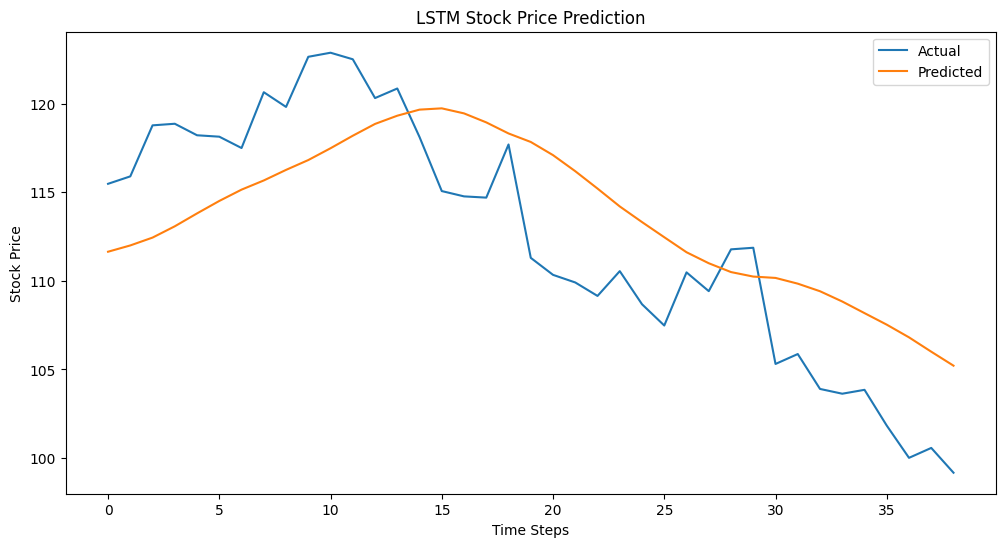

In [14]:
# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()



### Modifying the model to improve performace

Epoch 1/50
5/5 [==============================] - 10s 379ms/step - loss: 0.3328
Epoch 2/50
5/5 [==============================] - 2s 366ms/step - loss: 0.1798
Epoch 3/50
5/5 [==============================] - 2s 367ms/step - loss: 0.1602
Epoch 4/50
5/5 [==============================] - 2s 422ms/step - loss: 0.1379
Epoch 5/50
5/5 [==============================] - 2s 417ms/step - loss: 0.1433
Epoch 6/50
5/5 [==============================] - 2s 406ms/step - loss: 0.1396
Epoch 7/50
5/5 [==============================] - 2s 409ms/step - loss: 0.1273
Epoch 8/50
5/5 [==============================] - 2s 390ms/step - loss: 0.1193
Epoch 9/50
5/5 [==============================] - 2s 393ms/step - loss: 0.1222
Epoch 10/50
5/5 [==============================] - 2s 389ms/step - loss: 0.1271
Epoch 11/50
5/5 [==============================] - 2s 370ms/step - loss: 0.1263
Epoch 12/50
5/5 [==============================] - 2s 374ms/step - loss: 0.1145
Epoch 13/50
5/5 [==============================]

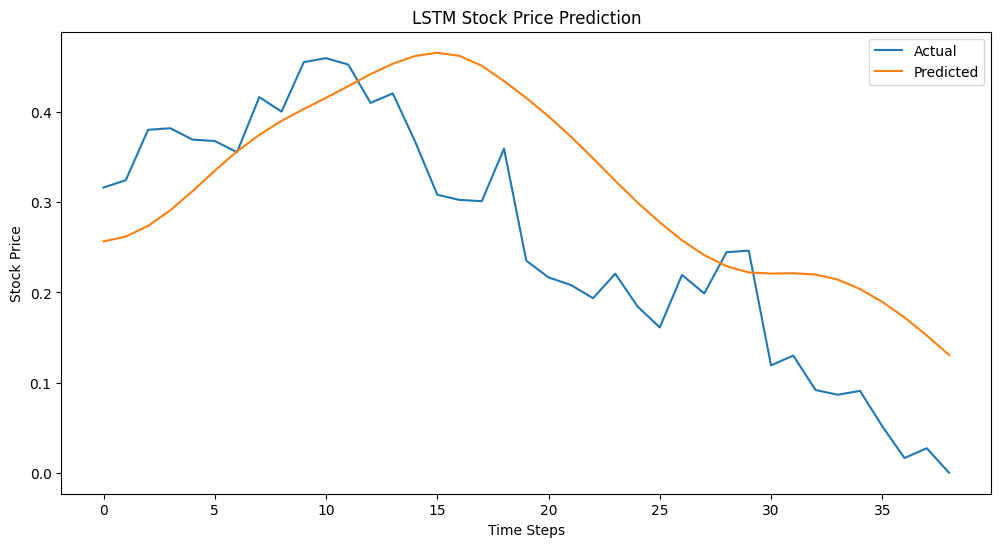

In [15]:
# Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)


# Create the Dataset
time_step = 60  # Using 60 days of data to predict the next day's price
X, y = create_dataset(data, time_step)

# Reshape for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM Model
model = Sequential()

# --- Modify the number of LSTM layers and units to experiment with model complexity ---
model.add(LSTM(units=256, return_sequences=True, input_shape=(time_step, 1)))  # <-- Experiment with 'units'
model.add(Dropout(0.3))  # Experiment with dropout for regularization

model.add(LSTM(units=256, return_sequences=True))  # <-- Set return_sequences=True to stack another LSTM
model.add(Dropout(0.4))

model.add(LSTM(units=128, return_sequences=True))  # <-- Last LSTM layer with return_sequences=False
model.add(Dropout(0.4))

model.add(LSTM(units=128, return_sequences=False))  # <-- Last LSTM layer with return_sequences=False
model.add(Dropout(0.4))

model.add(Dense(1))  # Final output layer

model.compile(optimizer='adam', loss='mean_absolute_error')

model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

# Predict on the Test Data
y_pred = model.predict(X_test)

# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

# Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()


### 1. What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model?

The purpose of normalizing the 'Close' prices is to scale the data into a smaller range, typically between 0 and 1. This process has several benefits:

- **Improved Convergence**: Normalizing the data helps in faster convergence during the training process by ensuring that the gradients are not too large or too small, which can otherwise slow down or destabilize the learning process.

- **Reduced Bias**: Different features in the dataset may have different scales, and normalization helps to reduce any bias towards features with larger ranges, ensuring that each feature contributes equally to the learning process.

- **Stability**: LSTM models, in particular, benefit from normalization as they involve repeated multiplications in their internal calculations, and unnormalized data can lead to unstable training.

---

### 2. What is the purpose of the Dropout layer in the LSTM model?

The purpose of the Dropout layer is to randomly "drop out" (i.e., set to zero) a fraction of the neurons during each training iteration. This helps the model to:

- **Prevent Overfitting**: By randomly dropping out neurons, the model is forced to learn more robust features that are not reliant on any particular set of neurons, reducing the likelihood of overfitting to the training data.

- **Improve Generalization**: Dropout helps the model generalize better to unseen data by ensuring that it doesn't become overly dependent on specific neurons or patterns that might not be present in the test data.

- **Enhance Network Diversity**: With Dropout, each forward pass during training uses a different subset of neurons, effectively training an ensemble of networks, which improves the overall performance and stability of the model.

---

### 3. In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?

If the predicted line closely follows the actual line in the plot, it indicates that the LSTM model has learned the underlying patterns in the stock price data well. This suggests:

- **High Accuracy**: The model is accurately capturing the temporal dependencies in the stock price data and is able to predict future prices that are very close to the actual prices.

- **Effective Learning**: The model has effectively learned the relationship between the input features and the 'Close' prices, indicating that the model's architecture, including the choice of LSTM layers, units, and hyperparameters, is appropriate for the task.

- **Good Generalization**: If the close following is observed not only on the training data but also on the test data, it indicates that the model is generalizing well to unseen data, making it a reliable predictor for future stock prices.
